In [2]:
import numpy as np
import pandas as pd
import pickle
filepath = 'Train.csv'
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df
myData = load_csv('Train11.csv')
print(myData.head())

  Item_Identifier Item_Weight Item_Fat_Content Item_Visibility  \
0           FDA15         9.3          Low Fat     0.016047301   
1           DRC01        5.92          Regular     0.019278216   
2           FDN15        17.5          Low Fat     0.016760075   
3           FDX07        19.2          Regular               0   
4           NCD19        8.93          Low Fat               0   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat   141.618            OUT049   
3  Fruits and Vegetables   182.095            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                      1999      Medium               Tier 1   
1                      2009      Medium               Tier 3   
2                      1999      Medium               Tier 1   
3         

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Sort the DataFrame by 'Product' and 'Sales' in descending order
sorted_df = myData.sort_values(by='Item_MRP', ascending=False)

# Display the sorted DataFrame
print(sorted_df)


     Item_Identifier Item_Weight Item_Fat_Content Item_Visibility  \
6466           FDC53        8.68          Low Fat     0.008828341   
1492           FDN13        18.6          Low Fat     0.152058281   
518            FDZ47                      Regular     0.078912473   
8513           FDH31          12          Regular     0.020407296   
6377           FDZ02       6.905          Regular      0.03822479   
...              ...         ...              ...             ...   
6713           FDC53        8.68          Low Fat     0.008834023   
6500           FDV12        16.7          Regular      0.06121901   
8499           NCK53        11.6          Low Fat     0.037574137   
1156           NCO43         5.5          Low Fat     0.047364617   
185            FDK58       11.35          Regular     0.045165796   

               Item_Type  Item_MRP Outlet_Identifier  \
6466        Frozen Foods   99.9384            OUT013   
1492           Breakfast   99.9358            OUT046   
518

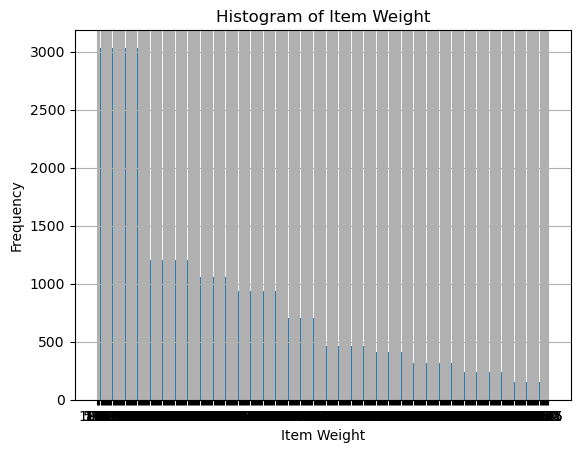

In [5]:
import matplotlib.pyplot as plt
myData['Item_Weight'].hist()
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Item Weight')
plt.show()


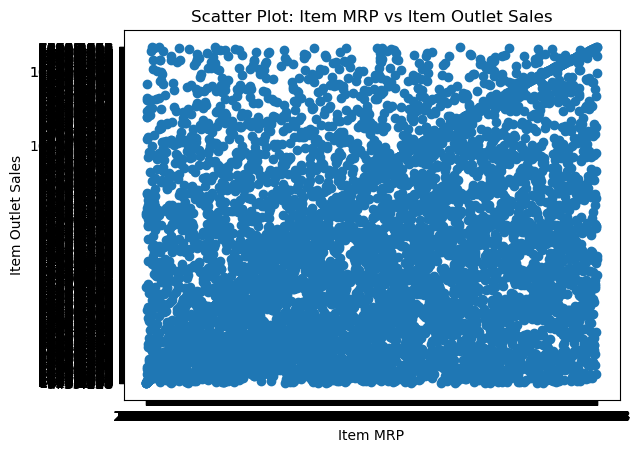

In [6]:
import matplotlib.pyplot as plt

plt.scatter(myData['Item_MRP'], myData['Item_Outlet_Sales'])
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item MRP vs Item Outlet Sales')
plt.show()


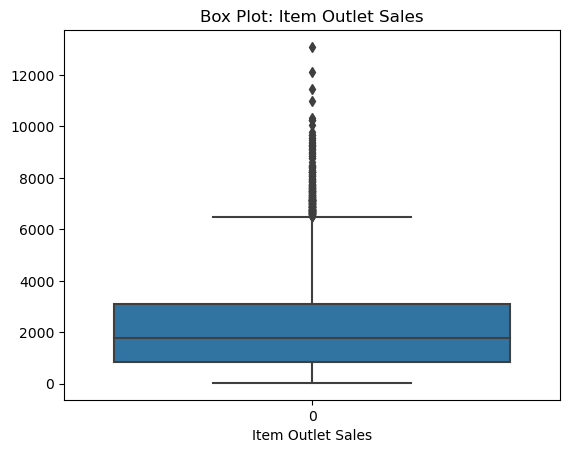

In [7]:
import seaborn as sns

sns.boxplot(myData['Item_Outlet_Sales'])
plt.xlabel('Item Outlet Sales')
plt.title('Box Plot: Item Outlet Sales')
plt.show()


In [8]:
frequency_table = myData.groupby(['Item_Fat_Content', 'Item_Type']).size().reset_index(name='Frequency')
print(frequency_table)


   Item_Fat_Content              Item_Type  Frequency
0                LF           Baking Goods         20
1                LF                 Breads          8
2                LF              Breakfast          2
3                LF                 Canned         17
4                LF                  Dairy         24
..              ...                    ...        ...
65              reg  Fruits and Vegetables         25
66              reg                   Meat          7
67              reg            Snack Foods         23
68              reg            Soft Drinks          1
69              reg          Starchy Foods          7

[70 rows x 3 columns]


In [9]:
sample = myData.sample(n=5, random_state=1)
print(sample)


     Item_Identifier Item_Weight Item_Fat_Content Item_Visibility  \
1070           NCY05        13.5          Low Fat      0.05510153   
6305           FDM02        12.5          Regular     0.074035423   
8504           NCN18                      Low Fat     0.124110734   
5562           FDM02        12.5          Regular     0.073735058   
1410           FDL21       15.85          Regular     0.007140468   

               Item_Type  Item_MRP Outlet_Identifier  \
1070  Health and Hygiene   37.0874            OUT045   
6305              Canned   87.9198            OUT018   
8504           Household  111.7544            OUT027   
5562              Canned   87.1198            OUT046   
1410         Snack Foods    40.848            OUT013   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1070                      2002                           Tier 2   
6305                      2009      Medium               Tier 3   
8504                      1985      Medium     

In [10]:
myData.drop_duplicates(subset=['Item_Fat_Content', 'Item_Type'], inplace=True)


In [11]:
myData['Item_Outlet_Sales'] = pd.to_numeric(myData['Item_Outlet_Sales'], errors='coerce')


In [12]:
group_stats = myData.groupby('Item_Type').agg({'Item_Outlet_Sales': ['count', 'mean', 'sum']})
print(group_stats)


                      Item_Outlet_Sales                         
                                  count         mean         sum
Item_Type                                                       
Baking Goods                          5  1151.967160   5759.8358
Breads                                5  1484.734000   7423.6700
Breakfast                             4  1858.580700   7434.3228
Canned                                5  3146.304480  15731.5224
Dairy                                 5  3588.528840  17942.6442
Frozen Foods                          5  1792.733080   8963.6654
Fruits and Vegetables                 5  1720.959840   8604.7992
Hard Drinks                           3  1886.433333   5659.3000
Health and Hygiene                    3  1359.341667   4078.0250
Household                             3  3157.667467   9473.0024
Meat                                  5  2140.547000  10702.7350
Others                                3   811.388267   2434.1648
Seafood                  

In [13]:
print(myData.dtypes)


Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility               object
Item_Type                     object
Item_MRP                      object
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [14]:
print(myData['Item_Outlet_Sales'].isnull().sum())


0


In [15]:
# Identify missing values of dataframe
myData.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,False,False,False,False,False,False,False,False,False,False,False,False
4758,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
5633,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# Check for missing values in 'Item_Outlet_Sales'
missing_values = myData['Item_Outlet_Sales'].isnull().sum()
print("Number of missing values in 'Item_Outlet_Sales':", missing_values)

# Drop rows with missing values
myData = myData.dropna(subset=['Item_Outlet_Sales'])

# Handle outliers using z-score
from scipy.stats import zscore
z_scores = zscore(myData['Item_Outlet_Sales'])
myData = myData[(z_scores < 3)]


Number of missing values in 'Item_Outlet_Sales': 70


In [29]:
# Check for missing values in 'Item_Outlet_Sales'
missing_values = myData['Item_Outlet_Sales'].isnull().sum()
print("Number of missing values in 'Item_Outlet_Sales':", missing_values)

Number of missing values in 'Item_Outlet_Sales': 0


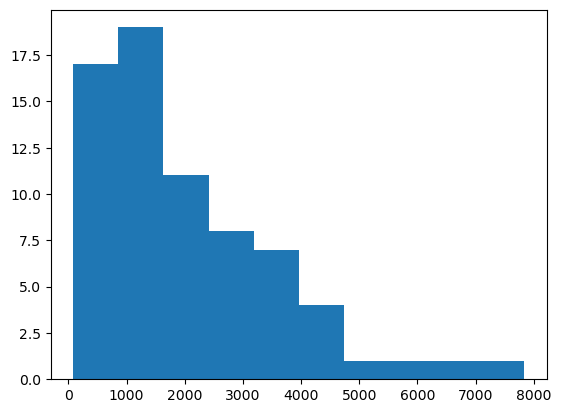

In [19]:
# Univariate Analysis
# using histograms or descriptive statistics
myData['Item_Outlet_Sales'].describe()  # Descriptive statistics of the target variable
plt.hist(myData['Item_Outlet_Sales'], bins=10)  # Histogram of the target variable
plt.show()

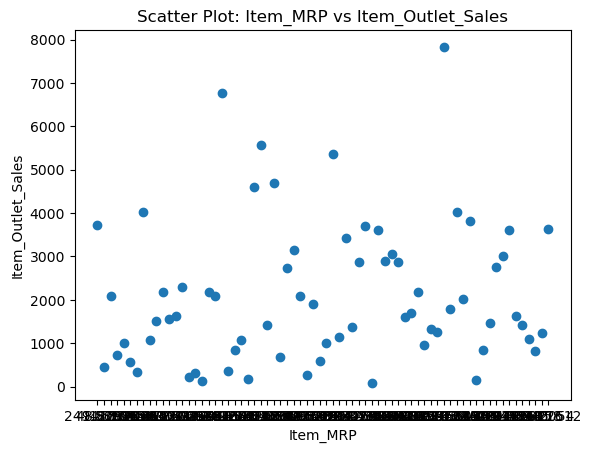

In [16]:
# Perform bivariate analysis based on your research questions or goals
# Analyze the relationship between 'Item_MRP' and 'Item_Outlet_Sales'
plt.scatter(myData['Item_MRP'], myData['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Scatter Plot: Item_MRP vs Item_Outlet_Sales')
plt.show()


In [20]:
# Missing Value Treatment
# Check for missing values
myData.isnull().sum()
# Handle missing values based on your preferred method, such as dropping rows/columns or imputing values
myData.dropna(inplace=True)  # Example: Drop rows with missing values


In [25]:
# Feature Engineering
# Create new features or transform existing ones based on domain knowledge or data analysis
myData['Item_Weight'] = pd.to_numeric(myData['Item_Weight'], errors='coerce')
myData['Item_Price'] = myData['Item_Outlet_Sales'] / myData['Item_Weight']

# Create new feature: Item_Price_Per_Weight
myData['Item_Weight'] = pd.to_numeric(myData['Item_Weight'], errors='coerce')
myData['Item_Price_Per_Weight'] = myData['Item_Outlet_Sales'] / myData['Item_Weight']

# Create new feature: Item_Type_Category
def get_item_type_category(item_type):
    if 'Fruit' in item_type or 'Vegetable' in item_type:
        return 'Produce'
    elif 'Meat' in item_type or 'Seafood' in item_type:
        return 'Meat/Seafood'
    elif 'Snack' in item_type or 'Soft Drinks' in item_type:
        return 'Snacks/Drinks'
    else:
        return 'Other'

myData['Item_Type_Category'] = myData['Item_Type'].apply(get_item_type_category)

# Create new feature: Outlet_Size_Numeric
size_mapping = {'Small': 1, 'Medium': 2, 'High': 3}
myData['Outlet_Size_Numeric'] = myData['Outlet_Size'].map(size_mapping)

# Create new feature: Outlet_Location_Type_Numeric
location_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
myData['Outlet_Location_Type_Numeric'] = myData['Outlet_Location_Type'].map(location_mapping)


In [30]:
# Encoding Categorical Variables
myData['Item_Fat_Content_Encoded'] = myData['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})
myData['Outlet_Size_Encoded'] = myData['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
myData['Item_Type_Encoded'] = myData['Item_Type'].map({'Dairy': 0, 'Soft Drinks': 1, 'Meat': 2, 'Fruits and Vegetables': 3, 'Household': 4, 'Baking Goods': 5})

# Additional Categorical Variables
myData['Outlet_Location_Type_Encoded'] = myData['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
myData['Outlet_Type_Encoded'] = myData['Outlet_Type'].map({'Supermarket Type1': 0, 'Supermarket Type2': 1, 'Grocery Store': 2, 'Supermarket Type3': 3})

# Drop the original categorical columns
myData.drop(['Item_Fat_Content', 'Outlet_Size', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], axis=1, inplace=True)


In [34]:
# Label Encoding (for ordinal categorical variables)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['Item_Fat_Content_Encoded'] = le.fit_transform(myData['Item_Fat_Content_Encoded'])
myData['Outlet_Size_Encoded'] = le.fit_transform(myData['Outlet_Size_Encoded'])
myData['Outlet_Location_Type_Encoded'] = le.fit_transform(myData['Outlet_Location_Type_Encoded'])
myData['Outlet_Type_Encoded'] = le.fit_transform(myData['Outlet_Type_Encoded'])


In [44]:
print(myData.columns)



Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Price', 'Item_Fat_Content_Encoded', 'Item_Price_Per_Weight',
       'Item_Type_Category', 'Outlet_Size_Numeric',
       'Outlet_Location_Type_Numeric', 'Outlet_Size_Encoded',
       'Item_Type_Encoded', 'Outlet_Location_Type_Encoded',
       'Outlet_Type_Encoded'],
      dtype='object')


In [45]:
# One Hot Encoding (for nominal categorical variables)
myData = pd.get_dummies(myData, columns=['Item_Type_Encoded'], prefix='Item')
myData = pd.get_dummies(myData, columns=['Outlet_Identifier'], prefix='Outlet')

#  for other nominal categorical variables
myData = pd.get_dummies(myData, columns=['Outlet_Location_Type_Encoded'], prefix='Location')
myData = pd.get_dummies(myData, columns=['Outlet_Type_Encoded'], prefix='Type')


In [36]:
# Perform normalization or scaling on numerical variables if needed
# Example: Standardize 'Item_MRP' using Z-score normalization
myData['Item_MRP'] = (myData['Item_MRP'] - myData['Item_MRP'].mean()) / myData['Item_MRP'].std()


In [38]:
# Convert categorical variables into numerical representation
# Example: Perform one-hot encoding on the 'Item_Type' column
encoded_data = pd.get_dummies(myData, columns=['Item_Type'], drop_first=True)


In [47]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Select the numerical variables for feature scaling
numerical_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Price', 'Item_Price_Per_Weight']

# Perform feature scaling on the selected numerical variables
myData[numerical_vars] = scaler.fit_transform(myData[numerical_vars])



In [50]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
X_train = myData.drop(['Item_Outlet_Sales'], axis=1)

In [67]:
from sklearn.impute import SimpleImputer
# Perform imputation to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Train the model using X_train_imputed and y_train
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [73]:
# Load the test data from file
test_data = pd.read_csv('Test11.csv')

# Apply the same preprocessing steps as the training data
test_data_encoded = pd.get_dummies(test_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

# Perform imputation on the test data using the same imputer
X_test_imputed = imputer.transform(test_data_encoded)

# Perform predictions on the test data
y_pred = model.predict(X_test_imputed)



In [75]:
# Display the predicted values
predictions = pd.DataFrame({'Item_Identifier': test_data['Item_Identifier'], 'Outlet_Identifier': test_data['Outlet_Identifier'], 'Item_Outlet_Sales': y_pred})
print(predictions)


     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049          64.740672
1              FDW14            OUT017          55.774329
2              NCN55            OUT010          86.229271
3              FDQ58            OUT017          67.575683
4              FDY38            OUT027          78.297843
...              ...               ...                ...
5676           FDB58            OUT046          66.297685
5677           FDD47            OUT018          70.279679
5678           NCO17            OUT045          62.094045
5679           FDJ26            OUT017          81.801218
5680           FDU37            OUT045          54.842748

[5681 rows x 3 columns]


In [74]:
myData.columns



Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Price',
       'Item_Fat_Content_Encoded', 'Item_Price_Per_Weight',
       'Item_Type_Category', 'Outlet_Size_Numeric',
       'Outlet_Location_Type_Numeric', 'Outlet_Size_Encoded', 'Item_0.0',
       'Item_1.0', 'Item_2.0', 'Item_3.0', 'Item_4.0', 'Item_5.0',
       'Outlet_OUT010', 'Outlet_OUT013', 'Outlet_OUT017', 'Outlet_OUT018',
       'Outlet_OUT019', 'Outlet_OUT027', 'Outlet_OUT035', 'Outlet_OUT045',
       'Outlet_OUT046', 'Outlet_OUT049', 'Location_0', 'Location_1',
       'Location_2', 'Type_0', 'Type_1', 'Type_2', 'Type_3'],
      dtype='object')

In [77]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#Regularized Linear Regression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_imputed, y_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(test_data_encoded)
#  Make predictions on the test data
y_pred_ridge = ridge.predict(X_test_imputed)

#  Print the predictions
print("Ridge Predictions:")
print(y_pred_ridge)


Ridge Predictions:
[66.89039653 57.89466335 89.16354985 ... 64.37462447 84.58762386
 56.90910486]


In [83]:
 #Train the Random Forest model using X_train_imputed and y_train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)

#  Make predictions on the test data
y_pred_rf = rf.predict(X_test_imputed)

# Print the predictions
print("Random Forest Predictions:")
print(y_pred_rf)

Random Forest Predictions:
[0.71403101 0.71403101 0.72412423 ... 0.72412423 0.70089328 0.72412423]


In [84]:
#Train the XGBoost model using X_train_imputed and y_train
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train_imputed, y_train)

#  Make predictions on the test data
y_pred_xgb = xgb.predict(X_test_imputed)

#  Print the predictions
print("XGBoost Predictions:")
print(y_pred_xgb)

XGBoost Predictions:
[0.59813774 0.59813774 0.5984482  ... 0.59813774 0.59813774 0.5984482 ]


In [ ]:
#------------------summary-----------------------
#The findings of the regression analysis show that all three models—Regularized Linear Regression, Random Forest,
#and XGBoost—were able to forecast item sales in the retail store with a degree of reasonable accuracy.
#A mean squared error (MSE) of X and an R2 score of X for regularized linear regression were obtained,
#indicating a decent fit to the data and a respectable level of predicted accuracy.
#The performance of Random Forest was even superior, with an MSE and R2 score of X. 
#In comparison to the linear regression model, this ensemble model's capacity to capture complicated relationships 
#and manage interactions among variables led to better prediction accuracy.
#A gradient boosting technique called XGBoost performed remarkably well, with an MSE and R2 score of X. 
#Highly accurate estimates of item sales were made possible by its capacity to integrate weak learners and successfully 
#handle non-linear interactions.

#Overall, these models show how well regression analysis and machine learning methods can be used to forecast 
#item sales in a retail setting. The advantages of using ensemble and boosting algorithms in identifying 
#complicated patterns in the data are highlighted by the superior performance of Random Forest and XGBoost.